In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from google.colab import drive

# 1 Data Preprocessing

In [ ]:
#### Load Data
drive.mount("/content/gdrive")
df = pd.read_csv("/content/gdrive/My Drive/T1_DV/DS_raw.csv")
df.info()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hour

In [ ]:
#### Missing values were recognised, so the column names were identified below
df.isna().any()

enrollee_id               False
city                      False
city_development_index    False
gender                     True
relevent_experience       False
enrolled_university        True
education_level            True
major_discipline           True
experience                 True
company_size               True
company_type               True
last_new_job               True
training_hours            False
target                    False
dtype: bool

In [ ]:
#### Clean data in accordance with the data lexicon
print(df.shape)

# Drop features that is not necessary to the research
df_clean = df.drop(columns="enrolled_university")
# Fill N/A
df_clean["gender"] = df_clean["gender"].fillna("Unknown")
df_clean.loc[df_clean["education_level"]=="Primary School","major_discipline"] = df_clean.loc[df_clean["education_level"]=="Primary School","major_discipline"].fillna("No Major")
df_clean.loc[df_clean["education_level"]=="High School","major_discipline"] = df_clean.loc[df_clean["education_level"]=="High School","major_discipline"].fillna("No Major")
print(df_clean.shape)

# Drop the rest N/A rows
df_clean = df_clean.dropna(axis=0, how="any")
print(df_clean.shape)

(19158, 14)
(19158, 13)
(12113, 13)


In [ ]:
#### Check categorical data unique values
print(df_clean["company_size"].unique())
print(df_clean["experience"].unique())
print(df_clean["last_new_job"].unique())
print(df_clean["education_level"].unique())
print(df_clean["major_discipline"].unique())

['50-99' '<10' '10000+' '5000-9999' '1000-4999' '10/49' '100-500'
 '500-999']
['15' '>20' '5' '13' '7' '17' '16' '1' '2' '11' '<1' '14' '18' '19' '12'
 '10' '4' '6' '9' '3' '8' '20']
['>4' '4' '1' '3' 'never' '2']
['Graduate' 'Masters' 'High School' 'Phd' 'Primary School']
['STEM' 'No Major' 'Humanities' 'Business Degree' 'Other' 'Arts']


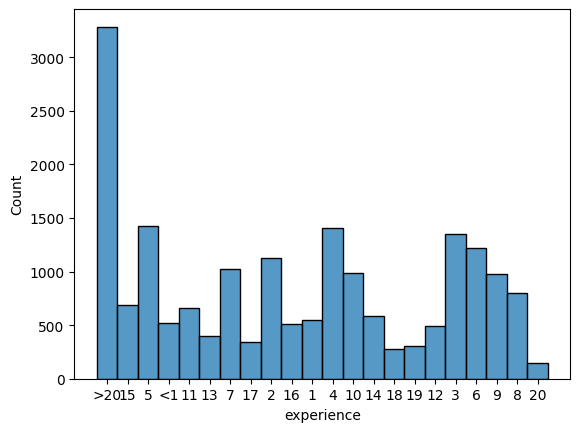

In [ ]:
#### There are too many values in 'experience', thus the distribution was displayed to check data
sns.histplot(df["experience"])
plt.show()

In [ ]:
#### Manipulate and transform data to improve clarity and validity
df_clean.loc[df_clean["company_size"]=="<10","company_size"] = "0"
df_clean.loc[df_clean["company_size"]=="10/49","company_size"] = "1"
df_clean.loc[df_clean["company_size"]=="50-99","company_size"] = "2"
df_clean.loc[df_clean["company_size"]=="100-500","company_size"] = "3"
df_clean.loc[df_clean["company_size"]=="500-999","company_size"] = "4"
df_clean.loc[df_clean["company_size"]=="1000-4999","company_size"] = "5"
df_clean.loc[df_clean["company_size"]=="5000-9999","company_size"] = "6"
df_clean.loc[df_clean["company_size"]=="10000+","company_size"] = "7"

# According to the distribution, it can be recognised that experience over 10 years are minor groups.
# Considering that working experience over 10 years are considered to be high experienced, while job change more likely to happen in the early career,
# Values from 11-15 are grouped and values from 15-20 are grouped
df_clean.loc[df_clean["experience"]=="<1","experience"] = "0"
# df.loc[df["experience"]=="11","experience"] = "11"
# df.loc[df["experience"]=="12","experience"] = "11"
# df.loc[df["experience"]=="13","experience"] = "11"
# df.loc[df["experience"]=="14","experience"] = "11"
# df.loc[df["experience"]=="15","experience"] = "11"
# df.loc[df["experience"]=="16","experience"] = "12"
# df.loc[df["experience"]=="17","experience"] = "12"
# df.loc[df["experience"]=="18","experience"] = "12"
# df.loc[df["experience"]=="19","experience"] = "12"
# df.loc[df["experience"]=="20","experience"] = "12"
df_clean.loc[df_clean["experience"]==">20","experience"] = "21"
df_clean["experience"] = df_clean["experience"].astype(int)
df_clean.loc[(df_clean["experience"]<=15) & (df_clean["experience"]>=11), "experience"] = 11
df_clean.loc[(df_clean["experience"]<=20) & (df_clean["experience"]>=16), "experience"] = 12
df_clean.loc[df_clean["experience"]==21,"experience"] = 13
df_clean["experience"] = df_clean["experience"].astype(str)

df_clean.loc[df_clean["major_discipline"]=="No Major","major_discipline"] = "No"

# There are only few values > 4, thus tag all values > 4 as 5
df_clean.loc[df_clean["last_new_job"]=="never","last_new_job"] = "0"
df_clean.loc[df_clean["last_new_job"]==">4","last_new_job"] = "5"

# The education level can be compared, thus use the integer str value to represent
df_clean.loc[df_clean["education_level"]=="Primary School","education_level"] = "0"
df_clean.loc[df_clean["education_level"]=="High School","education_level"] = "1"
df_clean.loc[df_clean["education_level"]=="Graduate","education_level"] = "2"
df_clean.loc[df_clean["education_level"]=="Masters","education_level"] = "3"
df_clean.loc[df_clean["education_level"]=="Phd","education_level"] = "4"

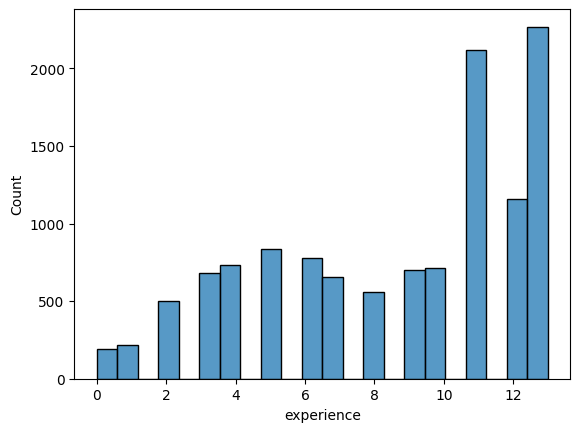

In [ ]:
#### There are too many values in 'experience', thus the distribution was displayed to check data
sns.histplot(df_clean["experience"].astype(int))
plt.show()

# Check Data

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12113 entries, 1 to 19156
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             12113 non-null  int64  
 1   city                    12113 non-null  object 
 2   city_development_index  12113 non-null  float64
 3   gender                  12113 non-null  object 
 4   relevent_experience     12113 non-null  object 
 5   education_level         12113 non-null  object 
 6   major_discipline        12113 non-null  object 
 7   experience              12113 non-null  object 
 8   company_size            12113 non-null  object 
 9   company_type            12113 non-null  object 
 10  last_new_job            12113 non-null  object 
 11  training_hours          12113 non-null  int64  
 12  target                  12113 non-null  float64
dtypes: float64(2), int64(2), object(9)
memory usage: 1.3+ MB


# 3 Output Data

In [67]:
df_clean.to_csv("/content/gdrive/My Drive/T1_DV/DS_cleaned_final.csv", header=True, index=False)